<a href="https://colab.research.google.com/github/Abhaysinghgithub/Abhaysinghgithub/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### **Date :** year-month-day
* ### **Rented Bike count -** Count of bikes rented at each hour
* ### **Hour -** Hour of he day
* ### **Temperature-** Temperature in Celsius
* ### **Humidity -** %
* ### **Windspeed -** m/s
* ### **Visibility -** 10m
* ### **Dew point temperature -** Celsius
* ### **Solar radiation -** MJ/m2
* ### **Rainfall -** mm
* ### **Snowfall -** cm
* ### **Seasons -** Winter, Spring, Summer, Autumn
* ### **Holiday -** Holiday/No holiday
* ### **Functional Day -** NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
# Viewing the Data of top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Viewing the data of bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#viewing the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Viewing the shape of Dataset
df.shape

(8760, 14)

In [ ]:
#Viewing the numerical details
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Viewing all the columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Viewing duplicate value
df.duplicated().sum()

0

In [ ]:
#Print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Viewing The Relation Between Numerical Columns
corr = df.corr()

# **Features Explanation and it's Data Type**


---




*   **Rented Bike Count:** This is dependet Variable and showsnumber of bike count per hour.
*   **Date:** Date Range in this dataset between 01/12/2017 to 30/11/2018.


*   **Hour:** In this dataset hour is in digital format.
*   **Seasons:** There are four seasons are shown in this dataset.

*  **Temperature:** Temperature shows in celsius. 

*   **Snowfall:** it shows amount of snowfall in cm.

*   **Rainfall:** It shows rainfall in mm.
*  **Wind speed:** It shows windspeed in m/s.


*   **Solar Radition:** It shows Solar radition intensity.


*   **Dew point temperature:** At this point the air cannot hold more water in the gas form.


*   **Visibility:** Visibility is in meter.

*  **Humidity:** it shows the amount of water vapour in the air.

*   **Holiday:** It shows if its during holiday.
*   **Functioning day:** It shows if the day is functioning or not.


   


  













   
 






 
  














 **A) This Dataset contains 8760 rows and 14 Columns.**

# **Preprocessing the dataset**
 Why do we need to handle the missing value?

The problem of missing value is quite common in many real-life datasets and Missing value can bias the results of the machine learning models and reduce the accuracy of the model.

# Missing Values

In [ ]:
#Check the any missing value in each columns
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Breaking Date Column

In [ ]:
#Changning thr Date Column into three Year,Month,Day column
df['Date'] = df['Date'].apply(lambda x:
                          dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
# change numerical column into categorical column
column_name = ['Hour','month','day','year']
for columns in column_name:
  df[columns]= df[columns].astype('category')

A) So We Convert the Data into 3 diffrent column i.e Year,Month,Day.

B) The year Column Contain basically 2 unique number from 2017 Dec to Dec 2018.

C) There are total 12 months.




# **Exploratory Data Analysis Of The Data Set**

Why is EDA Important?

Exploratory data analysis is essential for any business. It allows data   scientists to analyze the data before coming to any assumption. It ensures that the results produced are valid and applicable to business outcomes and goals.

In [ ]:
# Analysis for all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[col],color='g')
plt.show()
   


Text(0.5, 1.0, 'Count of bikes in holidays')

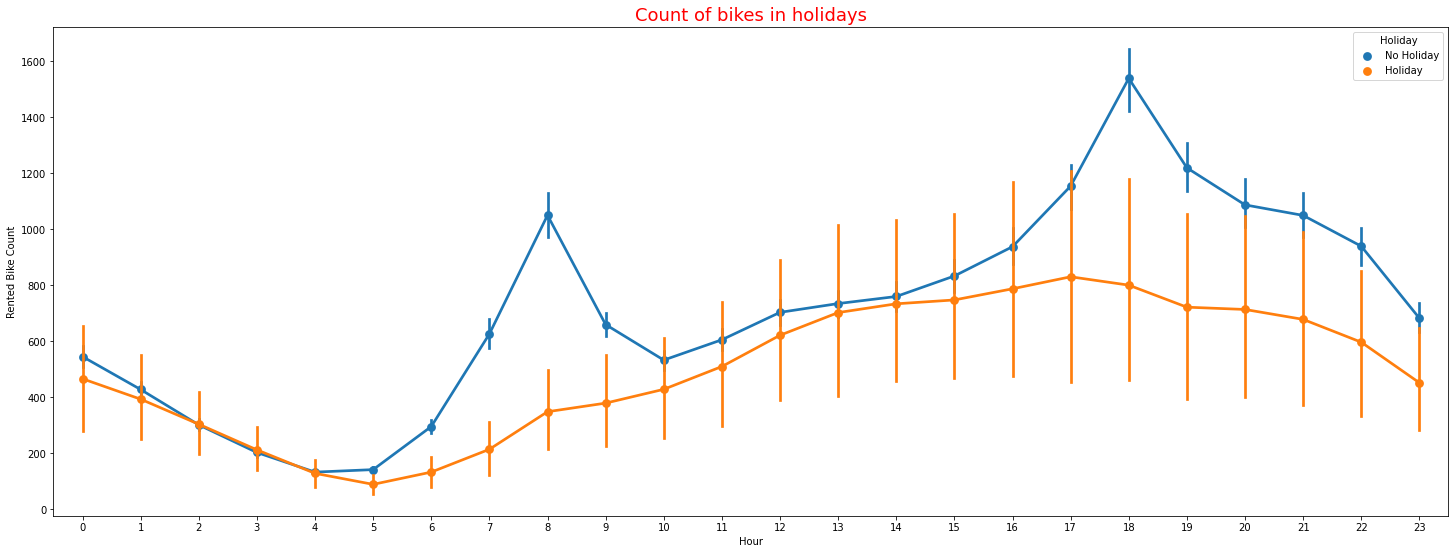

In [ ]:
#Analysis of data by visualization
plt.figure(figsize=(25,9))
ax=sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday')
ax.set_title('Count of bikes in holidays',size=18,color='red')


Text(0.5, 1.0, 'Count of bikes in Diffrent seasons')

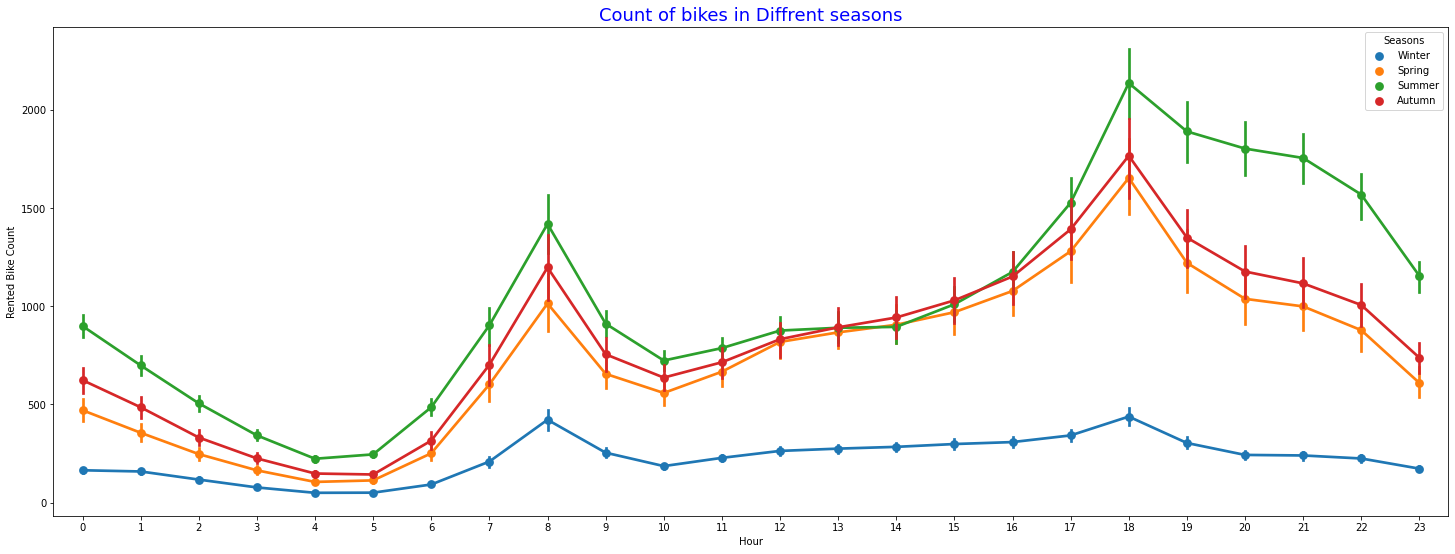

In [ ]:
plt.figure(figsize=(25,9))
ax=sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons')
ax.set_title('Count of bikes in Diffrent seasons',size=18,color='blue')

**Analyze of numerical column** 

In [ ]:
numerical_features = df.describe().columns
numerical_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Text(0.5, 1.0, 'Count of bikes during diffrent month')

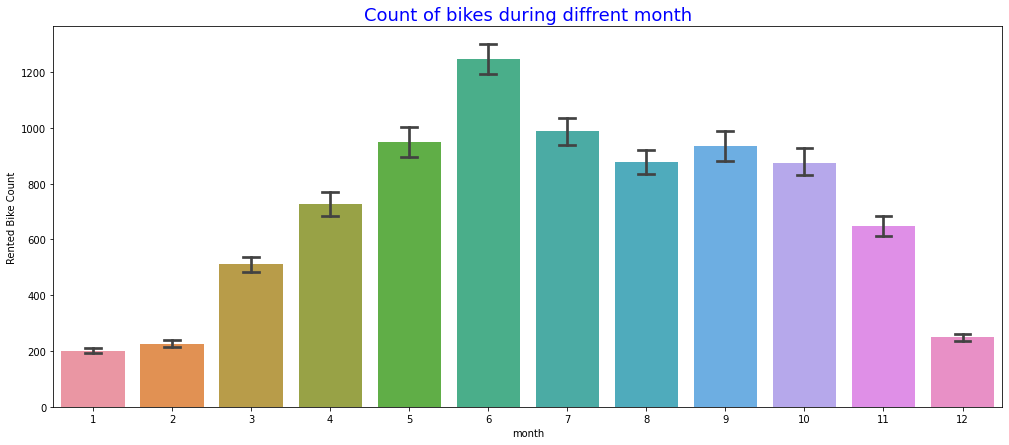

In [ ]:
# count of bikes in diffrent month
plt.figure(figsize=(17,7))
ax=sns.barplot(data=df,x='month',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent month',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent days')

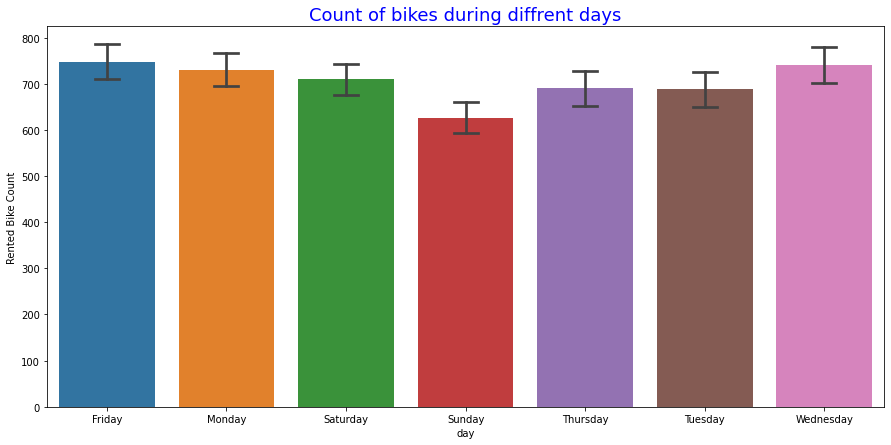

In [ ]:
#plot count of bike durind days
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='day',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent days',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent hours')

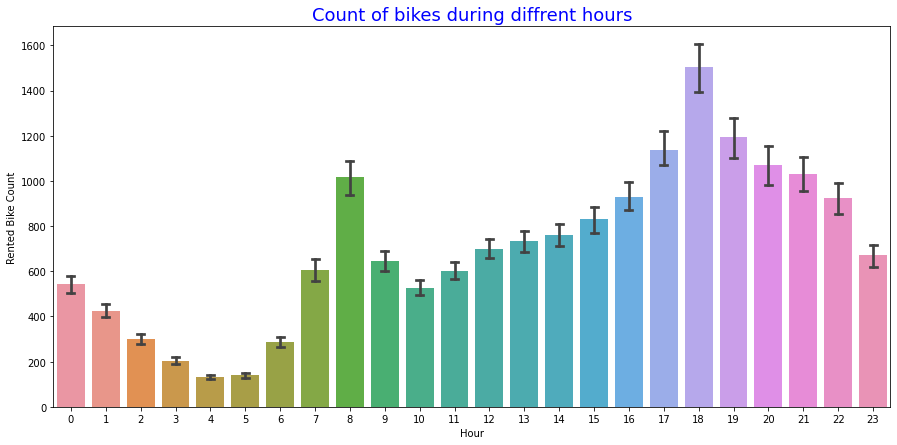

In [ ]:
# count of bikes in diffrent hours
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='Hour',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent hours',size=18,color='blue')

Text(0.5, 1.0, 'Count of bikes during diffrent Year')

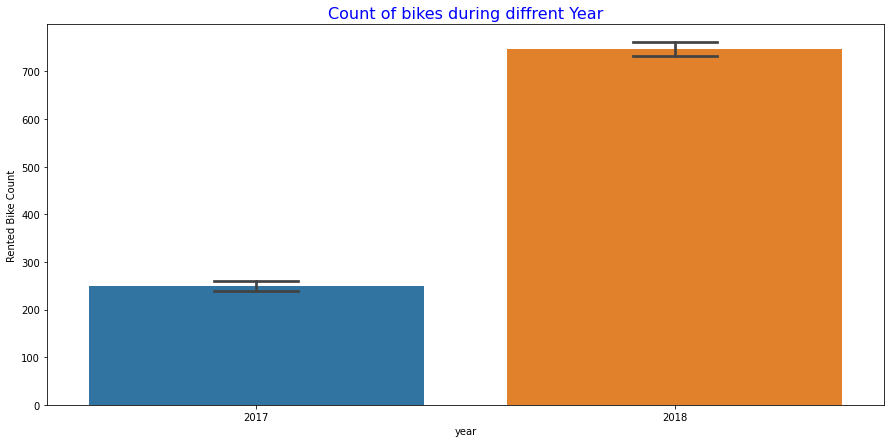

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=df,x='year',y='Rented Bike Count',capsize=0.2)
ax.set_title('Count of bikes during diffrent Year',size=16,color='blue')

[Text(0.5, 1.0, 'Relation Between Humidity And Users')]

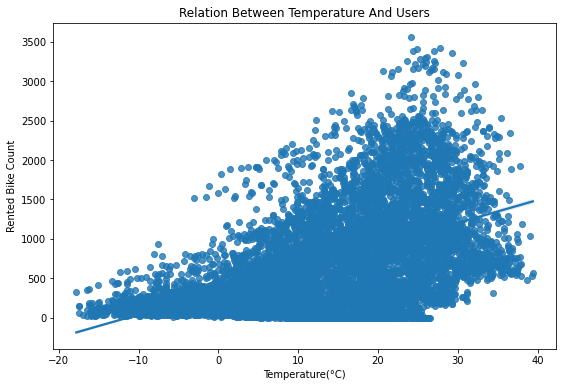

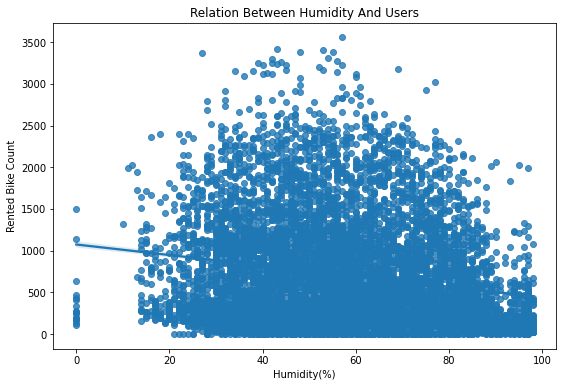

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax1=sns.regplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'])
ax1.set(title='Relation Between Temperature And Users')
fig = plt.figure(figsize=(9, 6))
ax2=sns.regplot(x=df['Humidity(%)'],y=df['Rented Bike Count'])
ax2.set(title='Relation Between Humidity And Users')

In [ ]:
from statsmodels.graphics.gofplots import qqplot
sns.distplot(df['Rented Bike Count'],ax=ax1)

ax1.set(title='Distrbution of the users')
qqplot(df['Rented Bike Count'],ax=ax2, line='s')
ax2.set(title='Therotical quantities')

[Text(0.5, 1.0, 'Therotical quantities')]

In [ ]:
numeric_features = df.describe().columns
numeric_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

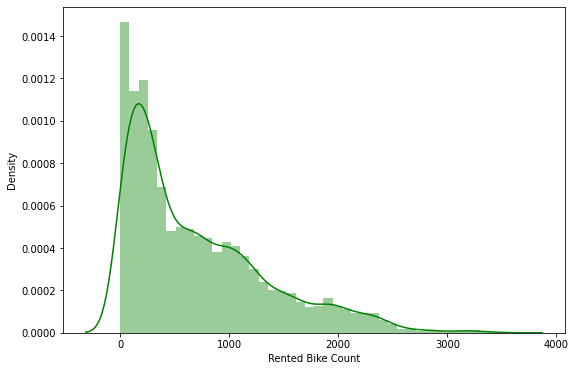

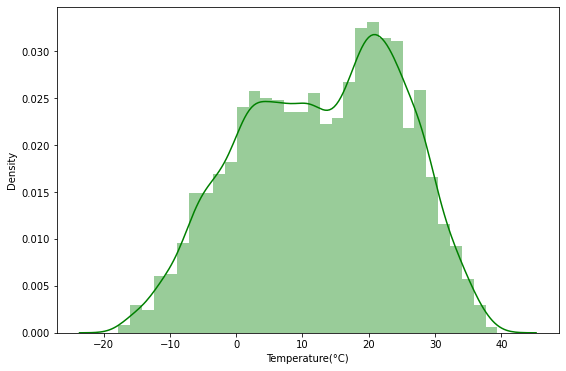

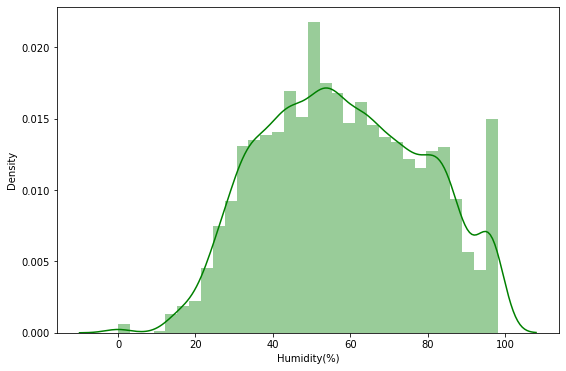

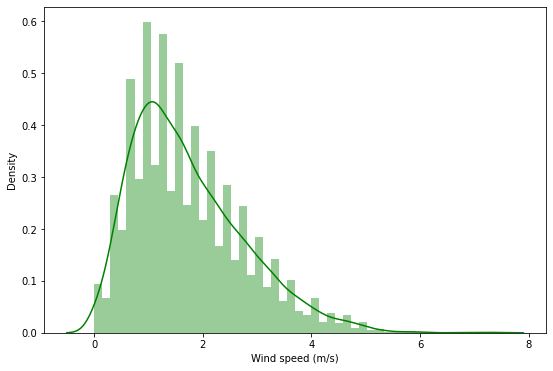

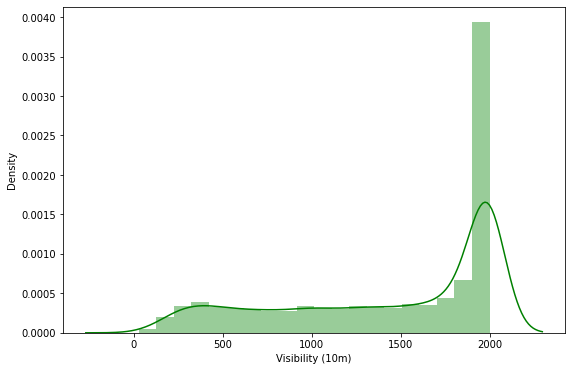

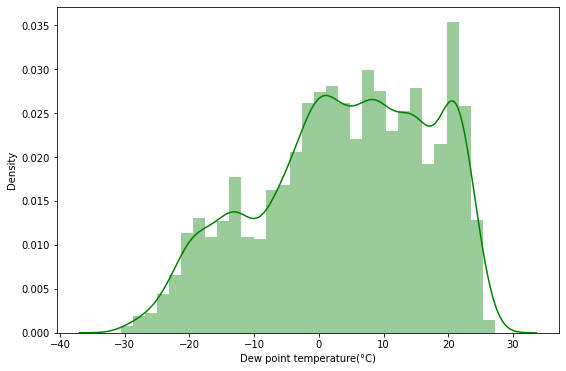

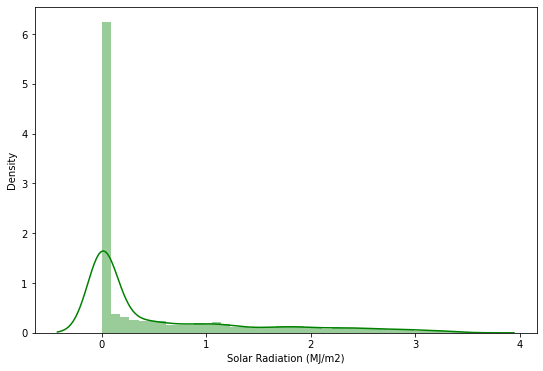

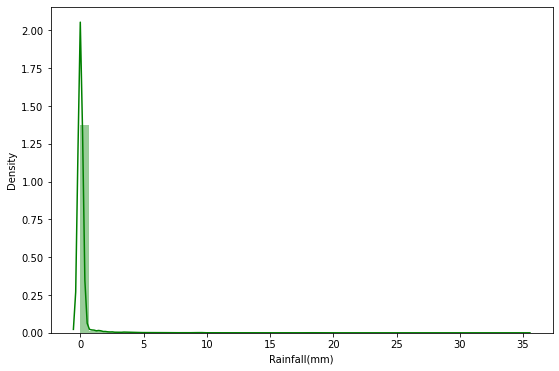

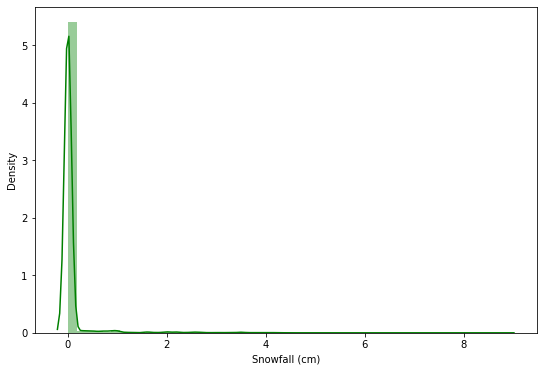

In [ ]:
#Viewing distplot to analyze the distribution of all numerical features
for col in numeric_features:
  fig = plt.figure(figsize=(9, 6))
  sns.distplot(x=df[col],color='g')
  plt.xlabel(col)
plt.show()

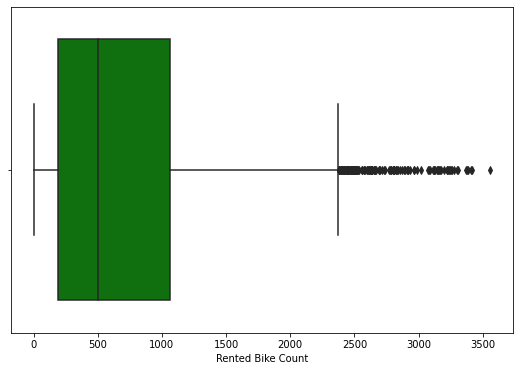

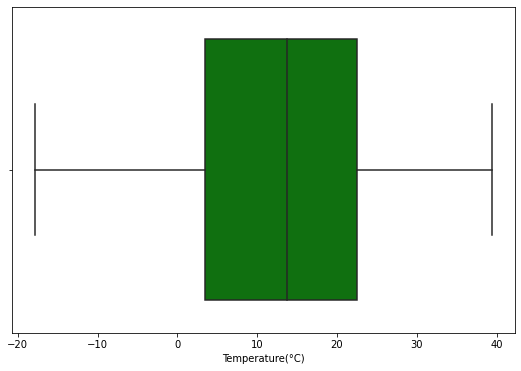

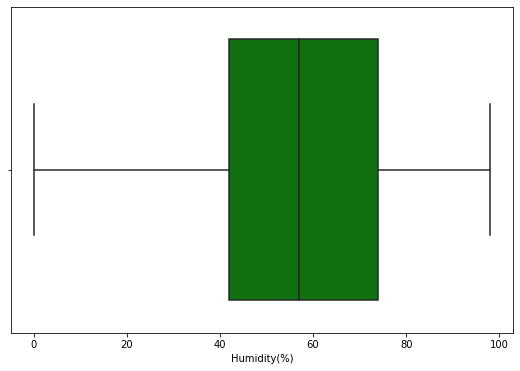

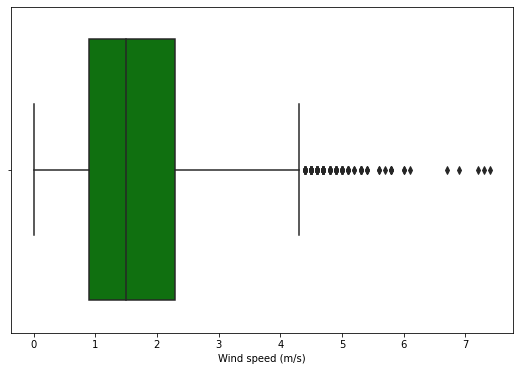

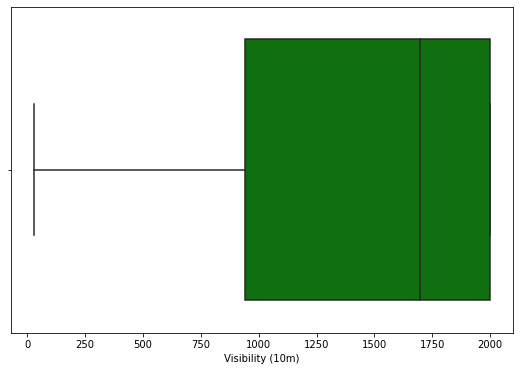

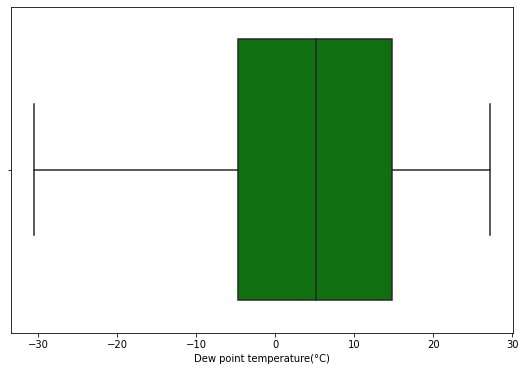

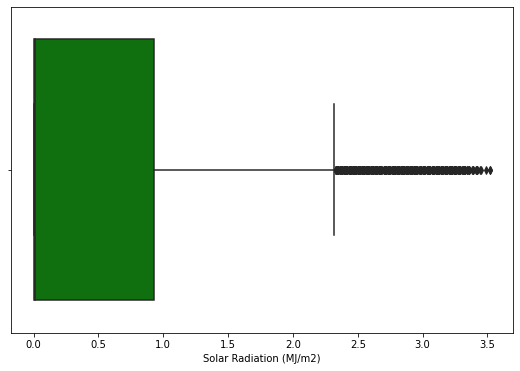

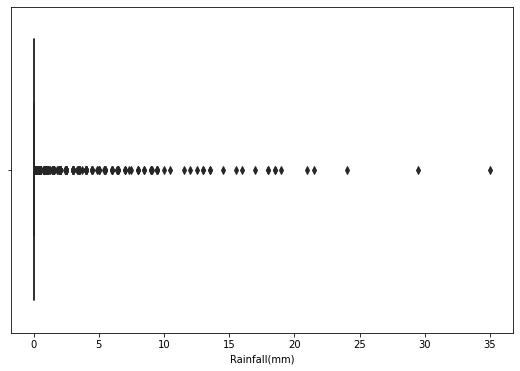

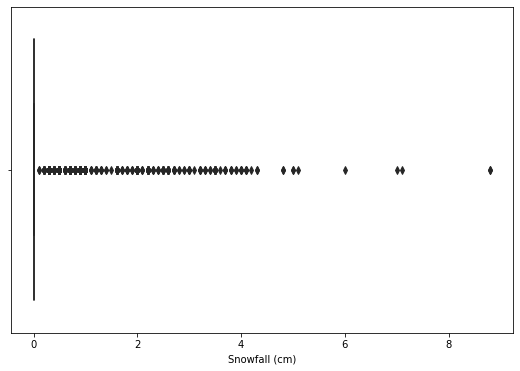

In [ ]:
for col in numerical_features:
  fig = plt.figure(figsize=(9, 6))
  sns.boxplot(x=df[col],color='g')
plt.show()

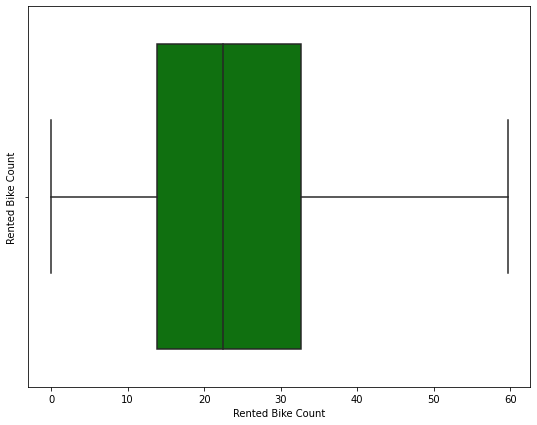

In [ ]:
#After applying sqrt on Rented Bike Count 
plt.figure(figsize=(9,7))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']),color='g')
plt.show()

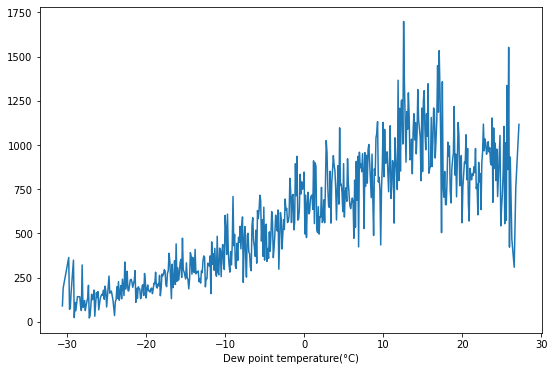

In [ ]:
# Viewing the relation between Dew point temp and Rented bike count
fig = plt.figure(figsize=(9, 6))
df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

From the above plot we see that peploe are take bike more in the Autumn season.




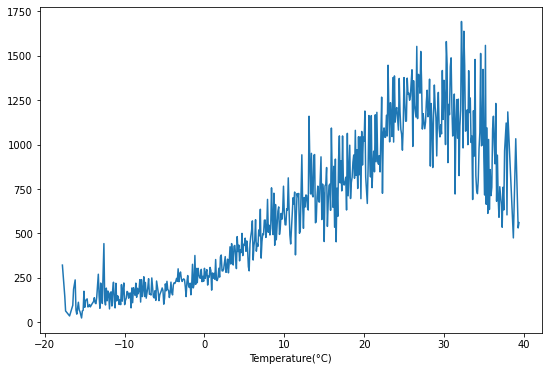

In [ ]:
# Viewing the relation between temp and Rented bike count
fig = plt.figure(figsize=(9, 6))
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

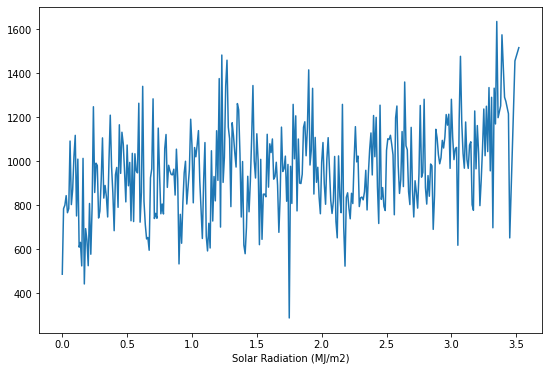

In [ ]:
# Print plot between Solar Radiation and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

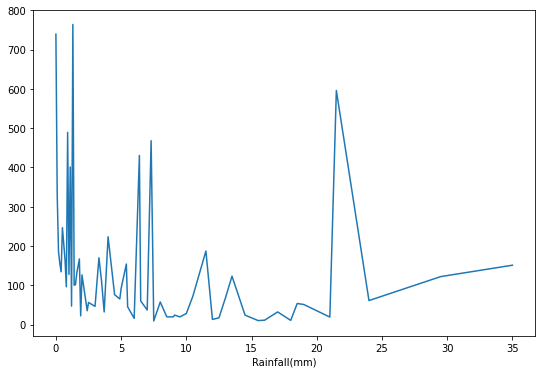

In [ ]:
# Print plot Between Rainfall and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

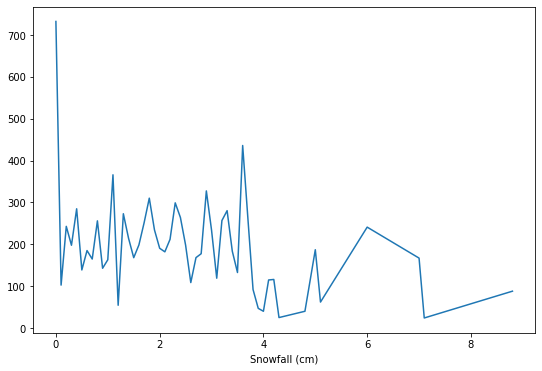

In [ ]:
# Print plot Between Snowfall and Rented Bike Count
fig = plt.figure(figsize=(9, 6))
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

In [ ]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')

# **Regression plot**

Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

In [ ]:
numeric_features = df.describe().columns
numeric_features 

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

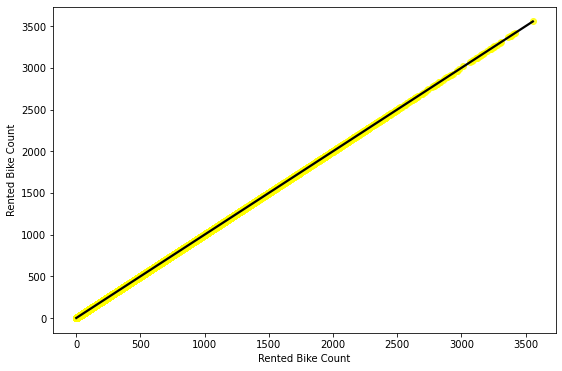

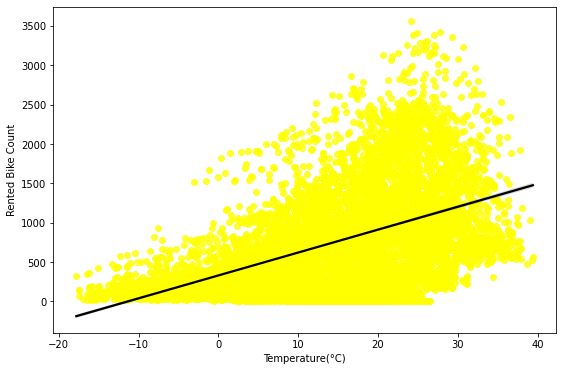

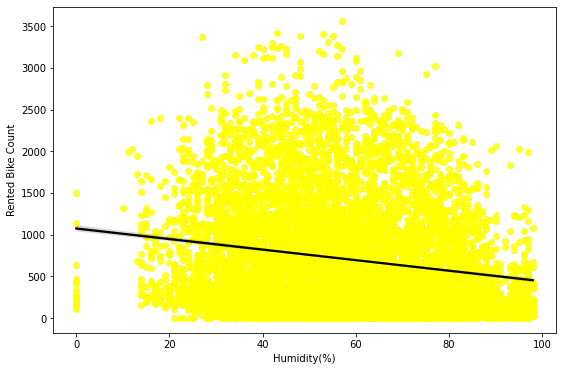

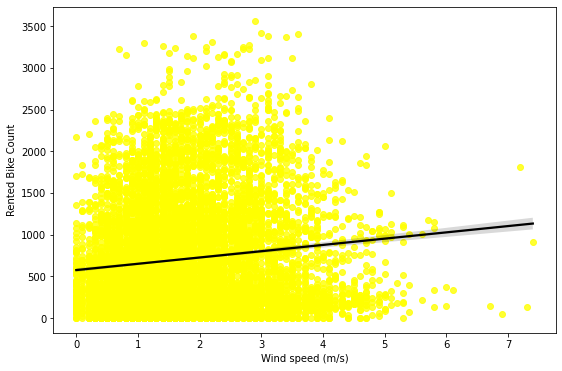

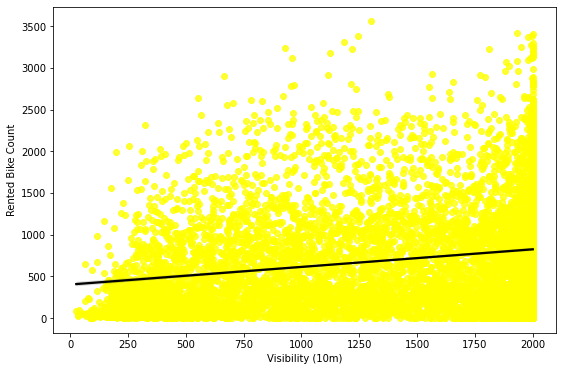

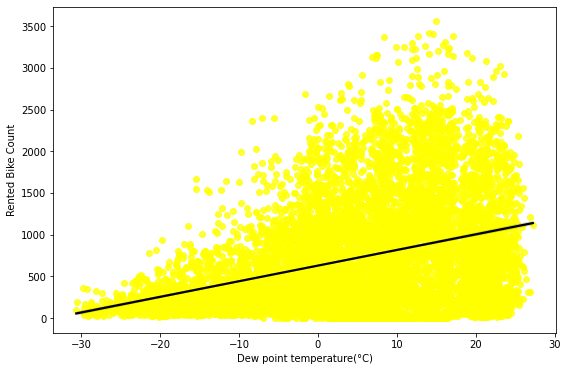

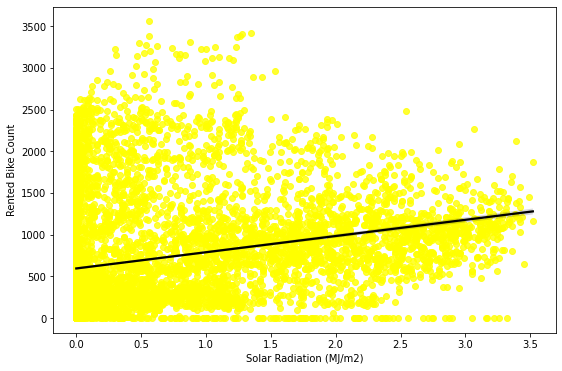

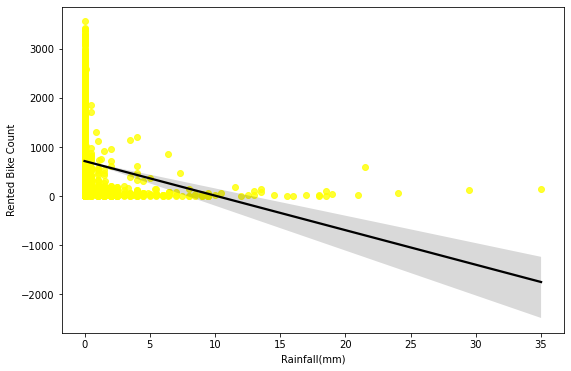

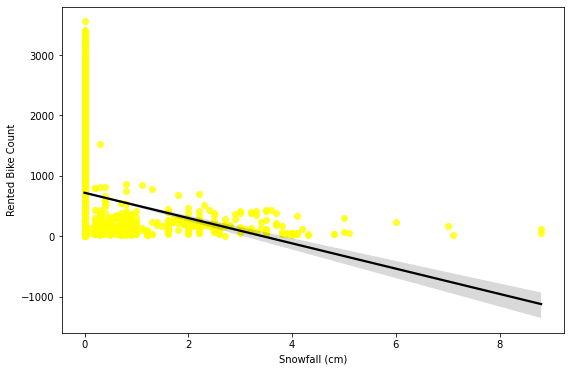

In [ ]:
# Print the regression plot for all the numeric feature columns
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": "yellow"},line_kws={"color":"black"})


In [ ]:
sns.pairplot(df,height=2)

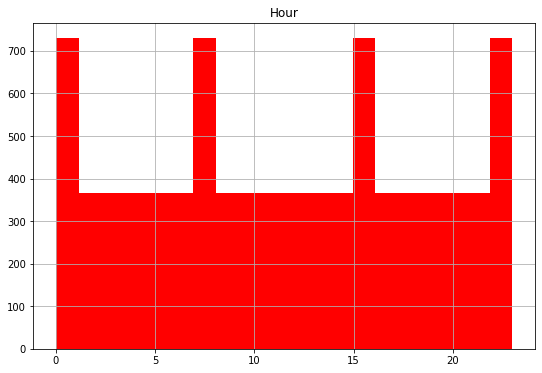

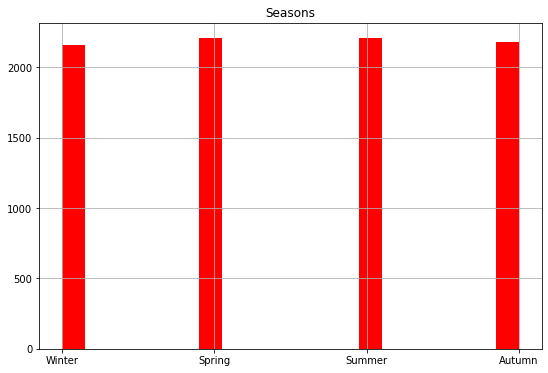

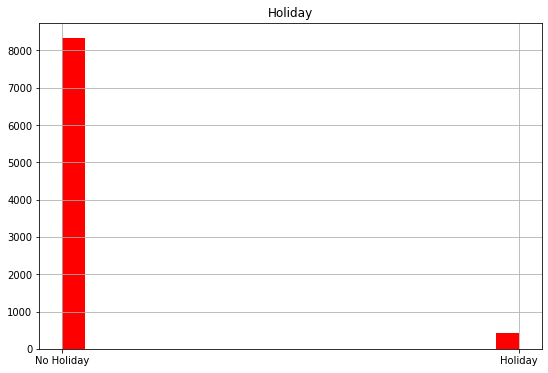

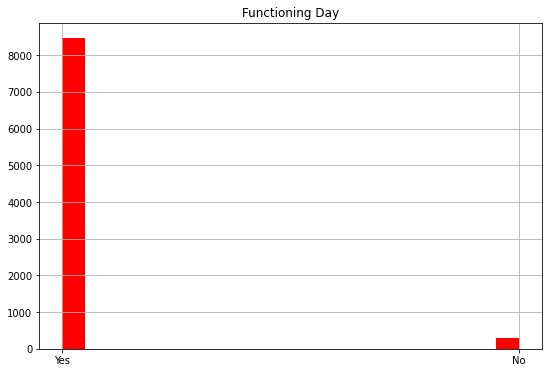

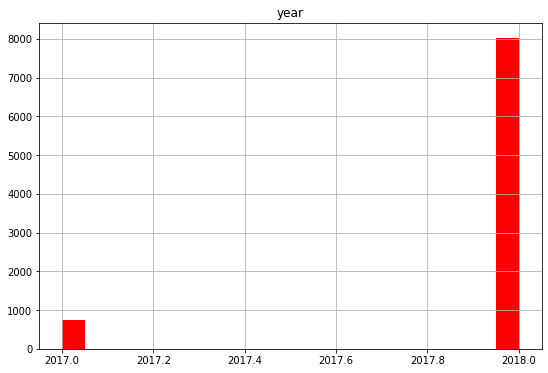

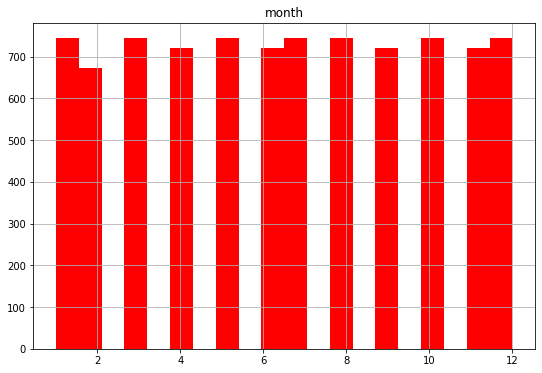

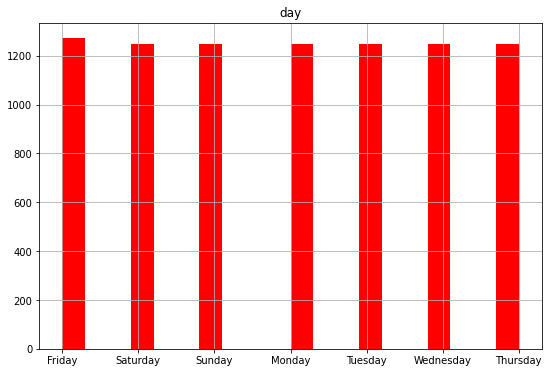

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=20,ax = ax,color='r') 
    ax.set_title(col)
plt.show()

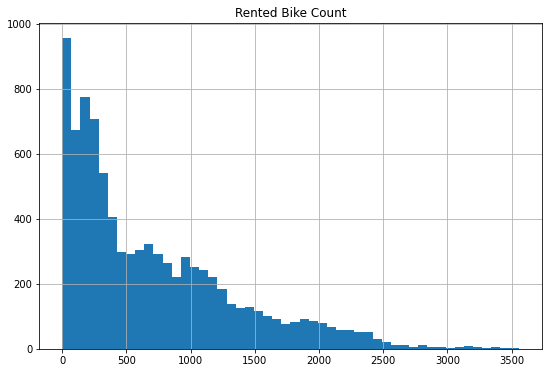

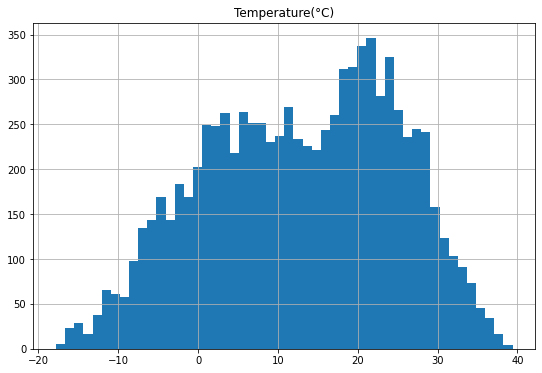

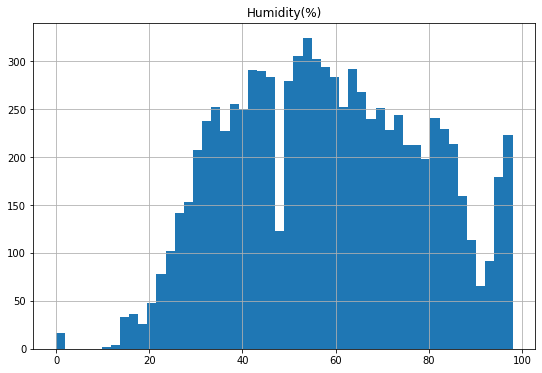

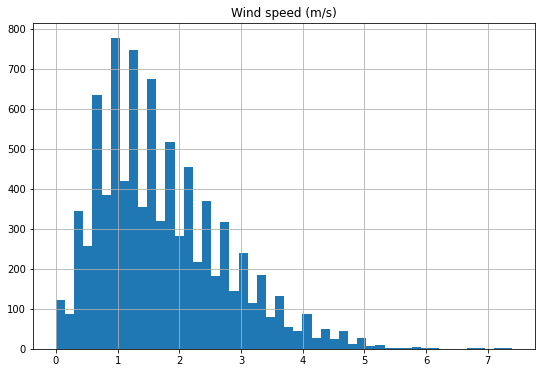

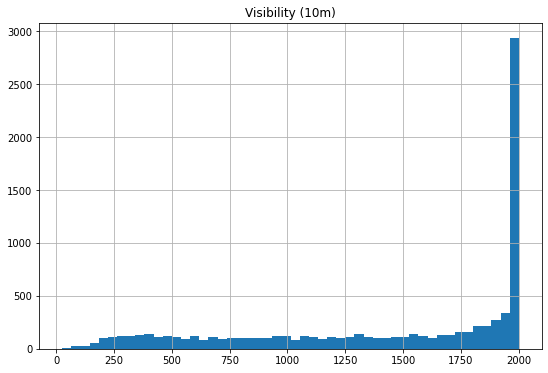

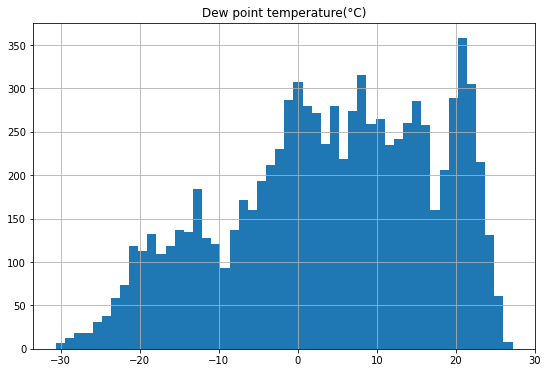

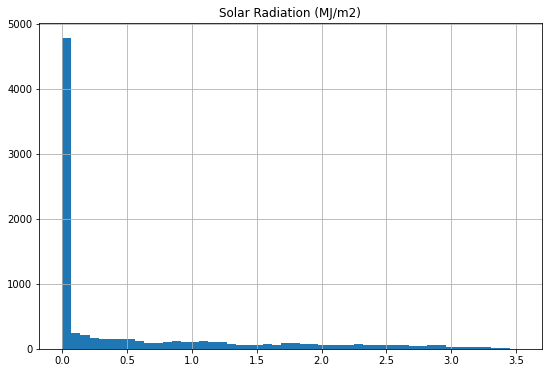

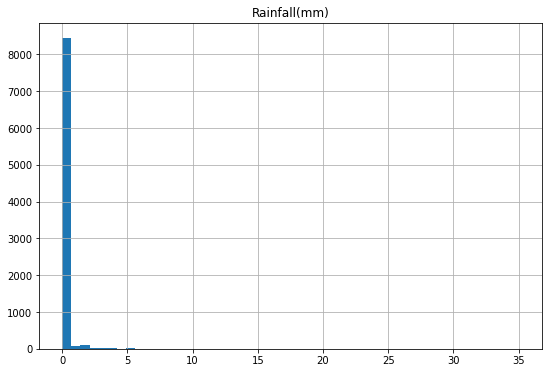

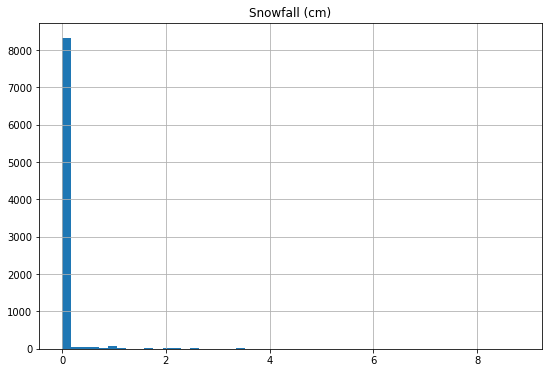

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax) 
    ax.set_title(col)
plt.show()

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Hour']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    ax.set_title(col)

In [ ]:
# Plot the corelation matrix
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

# **Create Dummy Variables**
dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome. They can be thought of as numeric stand-ins for qualitative facts in a regression model, sorting data into mutually exclusive categories.

In [ ]:
categorical_features = list(df.select_dtypes(['object','category']))
categorical_features=pd.get_dummies(df,categorical_features,drop_first=True)

In [ ]:
categorical_features

# **One hot encoding**

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [ ]:
# Create a copy of the datset
df_copy = df.copy()

In [ ]:
# apply one hot encoding
df_copy = pd.get_dummies(df_copy,columns=['Seasons', 'Holiday', 'Functioning Day', 'day','Hour','month'],drop_first=True)

In [ ]:
df_copy.head()

In [ ]:
# drop the Date column
df_copy = df_copy.drop(columns=['Date'])

# **Train-Test split**



* The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms.  
*  Generally, the training and validation data set is split into an 80:20 ratio. 



In [ ]:
# Assign the value of X and y
X = df_copy.drop(columns=['Rented Bike Count'],axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])


In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# apply train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 


In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
df_copy.describe().columns

In [ ]:
y_train

In [ ]:
X_train

# **Linear Regression**


In [ ]:
# Apply LinearRegression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train,y_train)

In [ ]:
reg.coef_

In [ ]:
len(reg.coef_)

In [ ]:
reg.intercept_

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
y_pred

**Calculate the value on train data**

In [ ]:
# Calculate the value of Mean squre error (MSE)
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE:' ,MSE)


In [ ]:
# Calculate the value of  Root mean squre Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


In [ ]:
# Calculate the mean absolute error (MAE)
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE:',MAE)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_test)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Calculate the value on test data**

In [ ]:
# Calculate the value of Mean squre error (MSE)
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE:' ,MSE)
# Calculate the value of  Root mean squre Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
# Calculate the mean absolute error (MAE)
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE:',MAE)
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=1.0, max_iter= 3000)

lasso.fit(X_train, y_train)

In [ ]:
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

In [ ]:
lasso.coef_

 **Get X_train  X_test split for lasso regression**

In [ ]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

**Calculate the value on train data for lasso regression**

In [ ]:
#calculate MSE for lasso
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

In [ ]:
#calculate Root mean squre error (RMSE) for lasso
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

In [ ]:
#calculate mean absolute error (MAE)  for lasso
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)

In [ ]:
#calculate r2 and adjusted r2 for lasso
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

**Calculate the value on test data for lasso regression**

In [ ]:
#calculate MSE for lasso
MSE_lasso= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_lasso)
#calculate Root mean squre error (RMSE) for lasso
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)
#calculate mean absolute error (MAE)  for lasso
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)
#calculate r2 and adjusted r2 for lasso
r2_lasso= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_lasso)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

In [ ]:

plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_lasso)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Ridge Regression**



*   Ridge regression is the method used for the analysis of multicollinearity in multiple regression data. 
*   It is most suitable when a data set contains a higher number of predictor variables than the number of observations.


*   The second-best scenario is when multicollinearity is experienced in a set.






In [ ]:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [ ]:
ridge.fit(X_train,y_train)

In [ ]:
#check the score
ridge.score(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

**Calculate the value on train data for redge regression**

In [ ]:

#calculate Mean sqqure error for redge regression
MSE_ridge= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_ridge)

#calculate Root mean squre error for redge regression
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)


#calculate mean absolute error for redge regression
MAE_ridge= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge)

#calculate r2 and adjusted r2
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_ridge)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

**Calculate the value on test data for redge regression**

In [ ]:
#calculate Mean squre error for redge regression
MSE_ridge= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge)

In [ ]:
#calculate root mean squre error for redge regression
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

In [ ]:
#calculate mean absolute error for redge regression
MAE_ridge= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)

In [ ]:
#calculate r2 
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_ridge)

In [ ]:
#calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_ridge)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Elastic Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

In [ ]:
elasticnet.score(X_train, y_train)

In [ ]:
y_pred_train_elastic=elasticnet.predict(X_train)
y_pred_test_elastic=elasticnet.predict(X_test)

**Calculate the value on train data for elastic regression**

In [ ]:

#calculate Mean squre error for elastic regression
MSE_elastic= mean_squared_error((y_train), (y_pred_train_elastic))
print("MSE :",MSE_elastic)

#calculate Root mean squre for elastic regression
RMSE_elastic=np.sqrt(MSE_elastic)
print("RMSE :",RMSE_elastic)


#calculate mean absolute error for elastic regression
MAE_elastic= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic)



#calculate r2 
r2_elastic= r2_score(y_train, y_pred_train_elastic)
print("R2 :",r2_elastic)
# calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.079943909482175
RMSE : 7.5551269949274955
MAE : 5.7474859198465955
R2 : 0.6301510464635889
Adjusted R2 : 0.6183821345655534


**Calculate the value on test data for elastic regression**





In [ ]:
#calculate Mean squre error for elastic regression
MSE_elastic= mean_squared_error((y_test), (y_pred_test_elastic))
print("MSE :",MSE_elastic)

#calculate Root mean squre for elastic regression
RMSE_elastic=np.sqrt(MSE_elastic)
print("RMSE :",RMSE_elastic)


#calculate mean absolute error for elastic regression
MAE_elastic= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic)


#calculate r2 
r2_elastic= r2_score(y_test, y_pred_test_elastic)
print("R2 :",r2_elastic)

# calculate adjusted r2
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.7362695667946
RMSE : 7.728924217948744
MAE : 5.840645682783431
R2 : 0.6206890008218877
Adjusted R2 : 0.6086189984909401


In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_elastic),(y_test-y_pred_test_elastic))

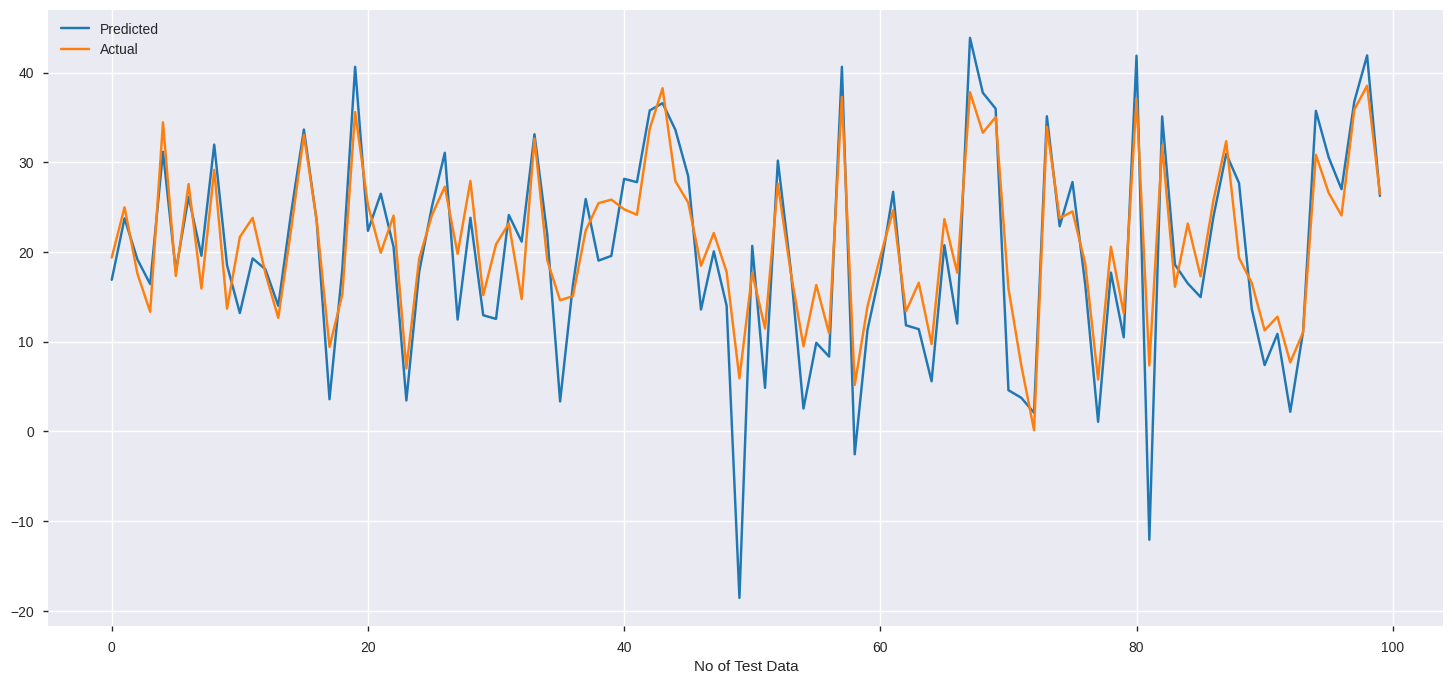

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_elastic)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,max_features=9, max_leaf_nodes=100,)

In [ ]:
decision_regressor.fit(X_train,y_train)

In [ ]:
decision_regressor.score(X_train,y_train)

In [ ]:
y_pred_train_decision = decision_regressor.predict(X_train)
y_pred_test_decision = decision_regressor.predict(X_test)

**Calculate the value on train data for Decision tree**

In [ ]:
#calculate Mean squre error for Decision tree
MSE_decision= mean_squared_error((y_train), (y_pred_train_decision))
print("MSE :",MSE_decision)

#calculate Root mean squre for decision tree
RMSE_decision=np.sqrt(MSE_decision)
print("RMSE :",RMSE_decision)


#calculate mean absolute error for decision tree
MAE_decision= mean_absolute_error(y_train, y_pred_train_decision)
print("MAE :",MAE_decision)



#calculate r2 
r2_decision= r2_score(y_train, y_pred_train_decision)
print("R2 :",r2_decision)
# calculate adjusted r2
print("Adjusted_R2_decision :",1-(1-r2_score(y_train, y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 49.62534842289796
RMSE : 7.044526131891198
MAE : 5.131970423194867
R2 : 0.678453027000266
Adjusted_R2_decision : 0.6682211256791195


**Calculate the value on test data for Decision tree**

In [ ]:
#calculate Mean squre error for Decision tree
MSE_decision= mean_squared_error((y_test), (y_pred_test_decision))
print("MSE :",MSE_decision)

#calculate Root mean squre for decision tree
RMSE_decision=np.sqrt(MSE_decision)
print("RMSE :",RMSE_decision)


#calculate mean absolute error for decision tree
MAE_decision= mean_absolute_error(y_test, y_pred_test_decision)
print("MAE :",MAE_decision)



#calculate r2 
r2_decision= r2_score(y_test, y_pred_test_decision)
print("R2 :",r2_decision)
# calculate adjusted r2
print("Adjusted_R2_decision :",1-(1-r2_score(y_train, y_pred_train_decision))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.21350239265634
RMSE : 7.563960760914637
MAE : 5.4177754415537285
R2 : 0.6367079679327508
Adjusted_R2_decision : 0.6682211256791195


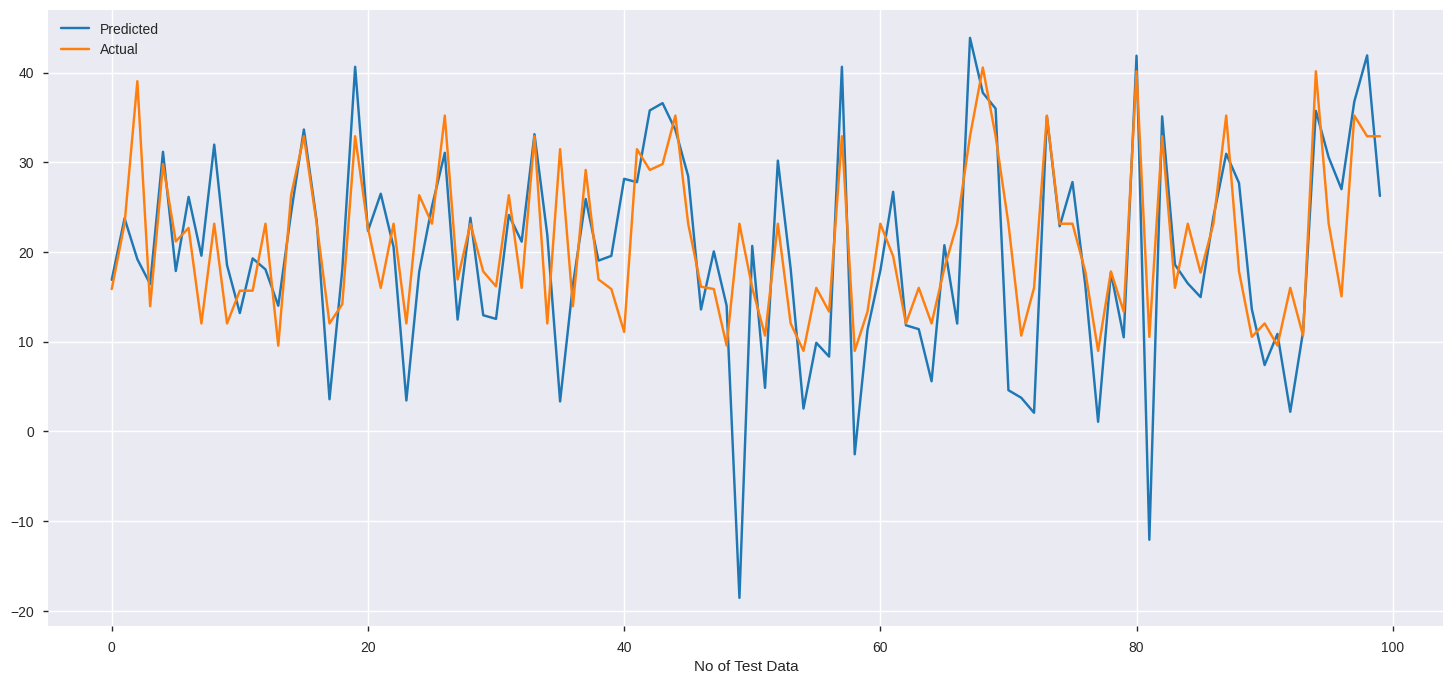

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_decision)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_decision),(y_test-y_pred_test_decision))

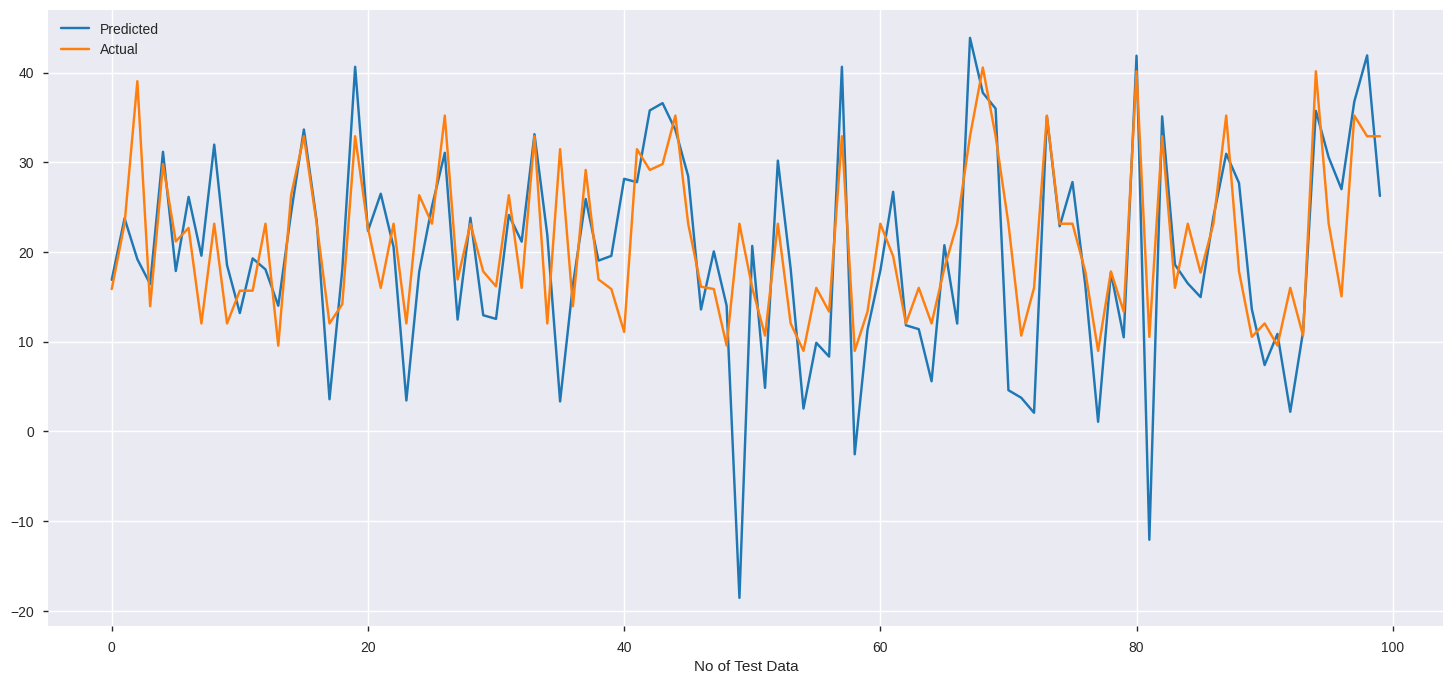

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_decision)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Random Forest**

**Random Forest**

Random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

 





In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_model = RandomForestRegressor()

In [ ]:
random_forest_model.fit(X_train,y_train)

In [ ]:
y_pred_train_random_forest = random_forest_model.predict(X_train)
y_pred_test_random_forest = random_forest_model.predict(X_test)

In [ ]:
random_forest_model.score(X_train,y_train)

**Calculate the value on train data for Random forest**

In [ ]:
#calculate Mean squre error for Random forest
MSE_random_forest= mean_squared_error((y_train), (y_pred_train_random_forest))
print("MSE :",MSE_random_forest)

#calculate Root mean squre for Random forest
RMSE_random_forest=np.sqrt(MSE_random_forest)
print("RMSE :",RMSE_random_forest)


#calculate mean absolute error for Random forest
MAE_random_forest= mean_absolute_error(y_train, y_pred_train_random_forest)
print("MAE :",MAE_random_forest)



#calculate r2 
r2_random_forest= r2_score(y_train, y_pred_train_random_forest)
print("R2 :",r2_random_forest)
# calculate adjusted r2
print("Adjusted_R2_random_forest :",1-(1-r2_score(y_train, y_pred_train_random_forest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.6900266899636223
RMSE : 1.3000102653300942
MAE : 0.8430042608885823
R2 : 0.9890494881403026
Adjusted_R2_random_forest : 0.9887010334317441


**Calculate the value on test data for Random forest**

In [ ]:
#calculate Mean squre error for Random forest
MSE_random_forest= mean_squared_error((y_test), (y_pred_test_random_forest))
print("MSE :",MSE_random_forest)

#calculate Root mean squre for Random forest
RMSE_random_forest=np.sqrt(MSE_random_forest)
print("RMSE :",RMSE_random_forest)


#calculate mean absolute error for Random forest
MAE_random_forest= mean_absolute_error(y_test, y_pred_test_random_forest)
print("MAE :",MAE_random_forest)



#calculate r2 
r2_random_forest= r2_score(y_test, y_pred_test_random_forest)
print("R2 :",r2_random_forest)
# calculate adjusted r2
print("Adjusted_R2_random_forest :",1-(1-r2_score(y_test, y_pred_test_random_forest))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 13.675876221960827
RMSE : 3.698090888818287
MAE : 2.301005575576969
R2 : 0.91316146267574
Adjusted_R2_random_forest : 0.9103981857072604


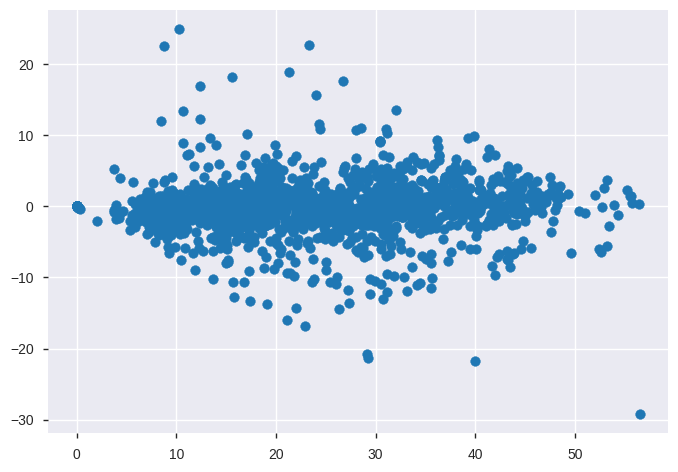

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_random_forest),(y_test)-(y_pred_test_random_forest))

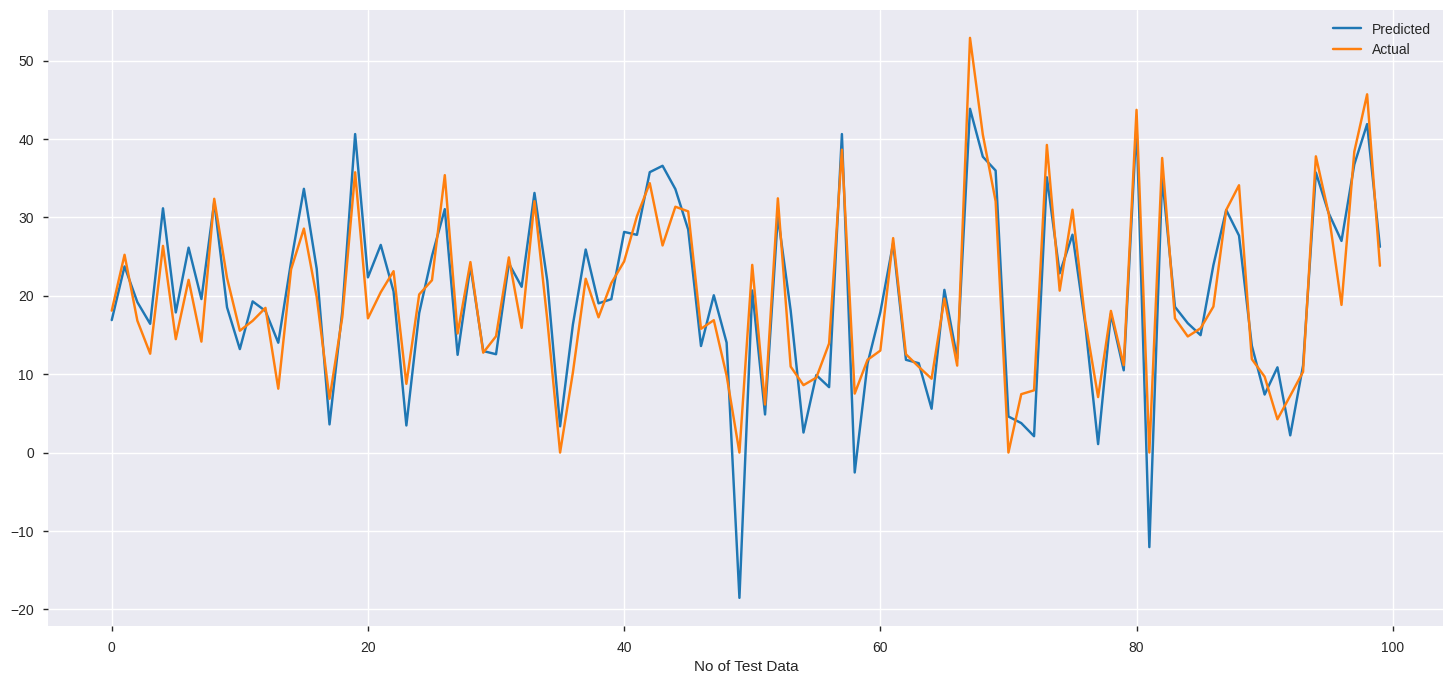

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_random_forest)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
random_forest_model.feature_importances_

array([3.12498586e-01, 1.52896269e-01, 1.12032101e-02, 1.10276383e-02,
       1.86803791e-02, 2.51816790e-02, 2.84881256e-02, 1.20710123e-03,
       4.41255183e-04, 3.45751561e-03, 8.18939471e-04, 9.68409203e-03,
       3.44332569e-03, 1.50285590e-01, 1.77170981e-03, 7.22385172e-03,
       1.03472039e-02, 1.36069791e-03, 9.73441263e-04, 1.46443197e-03,
       5.14839769e-03, 1.43313594e-02, 2.16313742e-02, 3.22588628e-02,
       2.83750232e-02, 9.07151819e-03, 3.73131000e-03, 1.39292208e-02,
       7.98123080e-04, 2.01240284e-03, 8.90393734e-04, 1.97586101e-04,
       1.93158208e-04, 2.73608027e-04, 1.22541921e-03, 3.15936661e-03,
       1.01984215e-02, 3.30728359e-02, 1.51346685e-02, 1.01838217e-02,
       1.04845508e-02, 8.03686390e-03, 2.71890127e-03, 2.79229667e-04,
       3.87504834e-03, 9.82584624e-04, 1.39584263e-03, 2.01278780e-03,
       4.85255384e-04, 1.28800975e-03, 7.46676920e-04, 3.37705191e-03,
       5.57200337e-03, 4.73279187e-04])

In [ ]:
importances = random_forest_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature(°C),0.31
13,Functioning Day_Yes,0.15
1,Humidity(%),0.15
37,Hour_18,0.03
23,Hour_4,0.03
24,Hour_5,0.03
5,Solar Radiation (MJ/m2),0.03
6,Rainfall(mm),0.03
22,Hour_3,0.02
38,Hour_19,0.02


In [ ]:
features = X_train.columns
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)

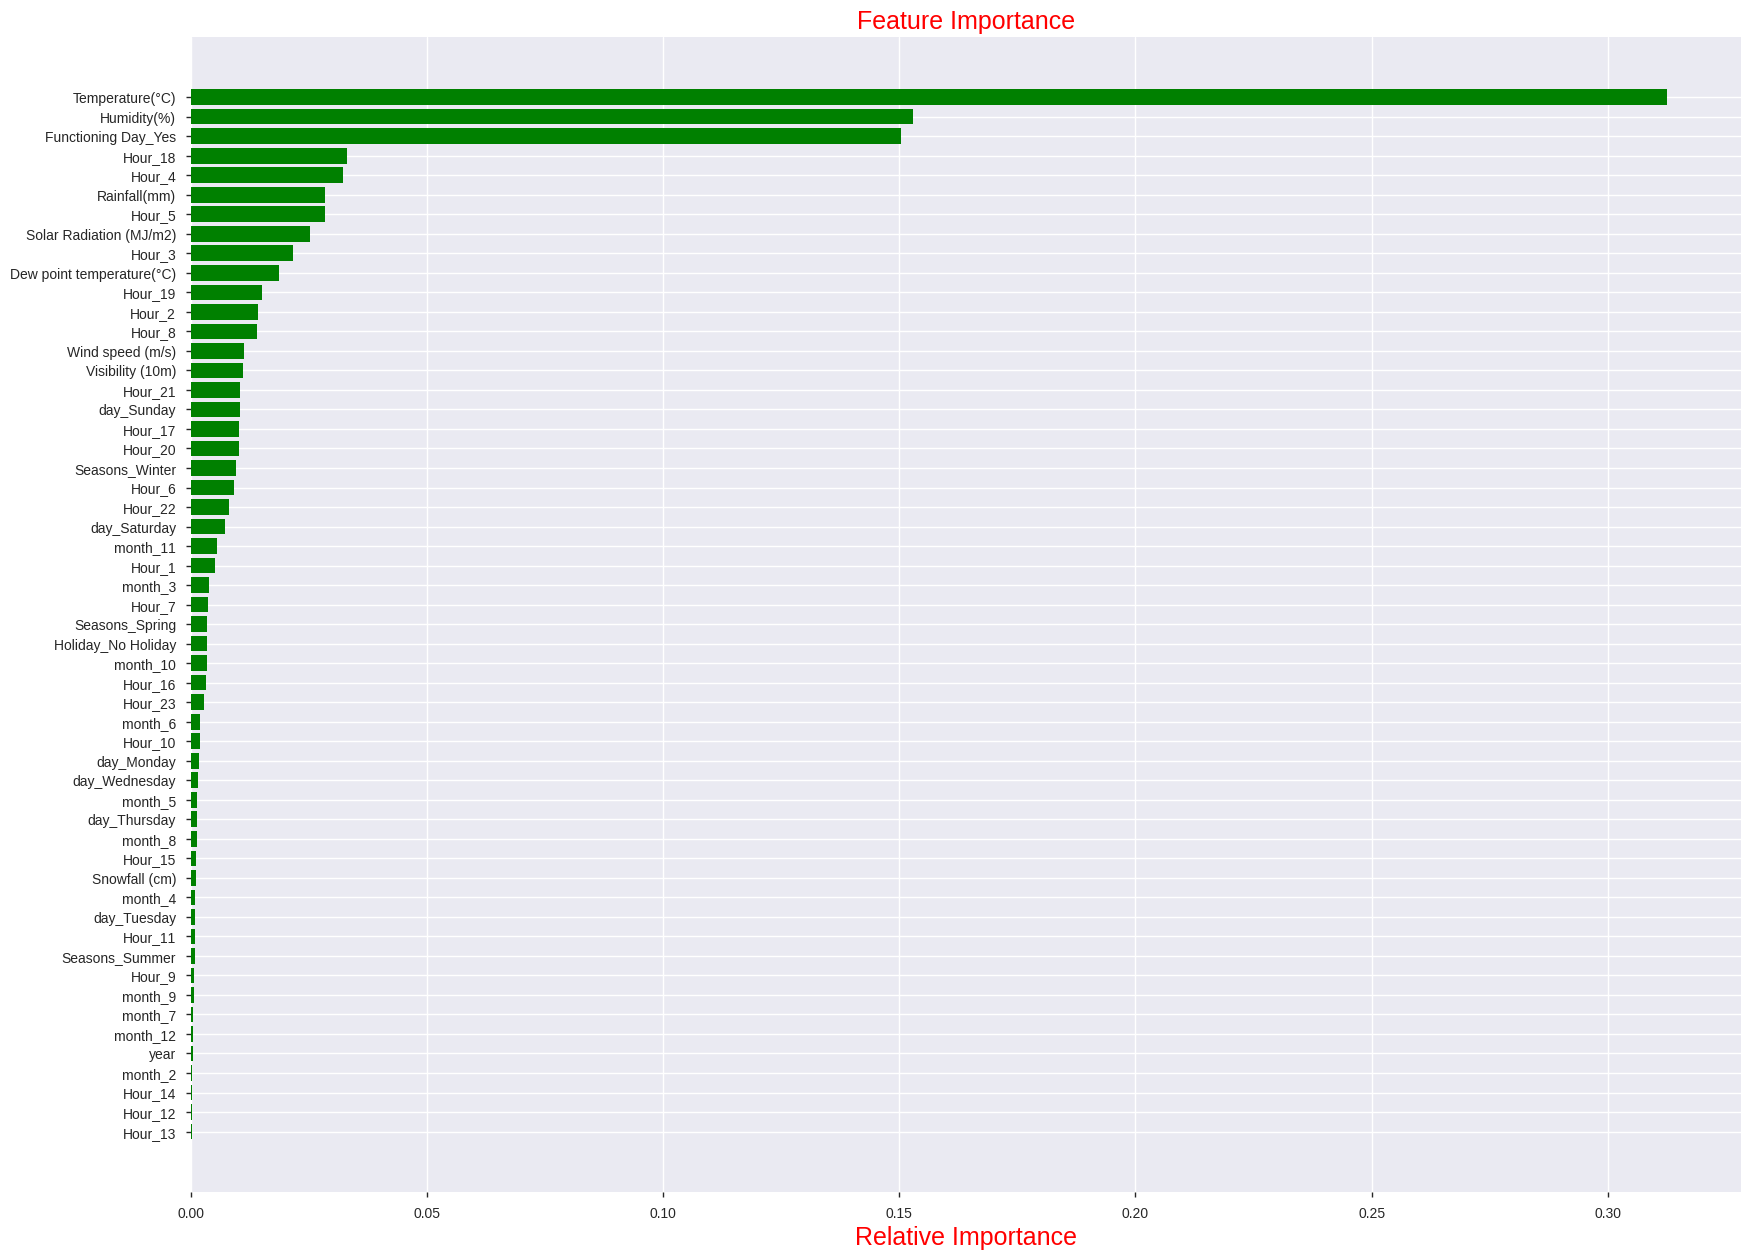

In [ ]:
#Plot the figure
plt.figure(figsize=(20,15))
plt.title('Feature Importance',color='red',size=18)
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',color='red',size=18)

plt.show()

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient_boosting_model = GradientBoostingRegressor()

In [ ]:
gradient_boosting_model.fit(X_train,y_train)

In [ ]:
y_pred_train_gradient_boosting = gradient_boosting_model.predict(X_train)
y_pred_test_gradient_boosting = gradient_boosting_model.predict(X_test)

In [ ]:
gradient_boosting_model.score(X_train,y_train)

**Calculate the value on train data for Gradient boosting**

In [ ]:
#calculate Mean squre error for gradient boosting
MSE_gradient_boosting= mean_squared_error((y_train), (y_pred_train_gradient_boosting))
print("MSE :",MSE_gradient_boosting)

#calculate Root mean squre for gradient boosting
RMSE_gradient_boosting=np.sqrt(MSE_gradient_boosting)
print("RMSE :",RMSE_gradient_boosting)


#calculate mean absolute error for gradient boosting
MAE_gradient_boosting= mean_absolute_error(y_train, y_pred_train_gradient_boosting)
print("MAE :",MAE_gradient_boosting)



#calculate r2 
r2_gradient_boosting= r2_score(y_train, y_pred_train_gradient_boosting)
print("R2 :",r2_gradient_boosting)
# calculate adjusted r2
print("Adjusted_R2_gradient_boosting :",1-(1-r2_score(y_train, y_pred_train_gradient_boosting))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 19.073565711364836
RMSE : 4.367329356868432
MAE : 3.3049241915051493
R2 : 0.8764130124279189
Adjusted_R2_gradient_boosting : 0.8724803681563265


**Calculate the value on test data for Gradient boosting**

In [ ]:
#calculate Mean squre error for gradient boosting
MSE_gradient_boosting= mean_squared_error((y_test), (y_pred_test_gradient_boosting))
print("MSE :",MSE_gradient_boosting)

#calculate Root mean squre for gradient boosting
RMSE_gradient_boosting=np.sqrt(MSE_gradient_boosting)
print("RMSE :",RMSE_gradient_boosting)


#calculate mean absolute error for gradient boosting
MAE_gradient_boosting= mean_absolute_error(y_test, y_pred_test_gradient_boosting)
print("MAE :",MAE_gradient_boosting)



#calculate r2 
r2_gradient_boosting= r2_score(y_test, y_pred_test_gradient_boosting)
print("R2 :",r2_gradient_boosting)
# calculate adjusted r2
print("Adjusted_R2_gradient_boosting :",1-(1-r2_score(y_test, y_pred_test_gradient_boosting))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.936809745923288
RMSE : 4.683674812145191
MAE : 3.5206640740626587
R2 : 0.860706514085178
Adjusted_R2_gradient_boosting : 0.8562740755233628


In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_gradient_boosting),(y_test)-(y_pred_test_gradient_boosting))

In [ ]:
plt.figure(figsize=(18,8))
plt.plot((y_pred)[0:100])
plt.plot(np.array((y_pred_test_gradient_boosting)[0:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **Hyperparameter Tuning**

**Hyperparameter Tuning**


* Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model.  
*  Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [ ]:
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]


param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

In [ ]:
from sklearn.model_selection import GridSearchCV
gradient_boosting_model = GradientBoostingRegressor()

# Grid search
gradient_boosting_grid = GridSearchCV(estimator=gradient_boosting_model,param_grid = param_dict,cv = 5, verbose=2)

gradient_boosting_grid.fit(X_train,y_train)